Deep Learning
=============

Assignment 1
------------

The objective of this assignment is to learn about simple data curation practices, and familiarize you with some of the data we'll be reusing later.

This notebook uses the [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset to be used with python experiments. This dataset is designed to look like the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, while looking a little more like real data: it's a harder task, and the data is a lot less 'clean' than MNIST.

In [3]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

First, we'll download the dataset to our local machine. The data consists of characters rendered in a variety of fonts on a 28x28 image. The labels are limited to 'A' through 'J' (10 classes). The training set has about 500k and the testset 19000 labelled examples. Given these sizes, it should be possible to train models quickly on any machine.

In [4]:
url = 'http://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None

def download_progress_hook(count, blockSize, totalSize):
    """A hook to report the progress of a download. This is mostly intended for users with
    slow internet connections. Reports every 1% change in download progress.
    """
    global last_percent_reported
    percent = int(count * blockSize * 100 / totalSize)

    if last_percent_reported != percent:
        if percent % 5 == 0:
            sys.stdout.write("%s%%" % percent)
            sys.stdout.flush()
        else:
            sys.stdout.write(".")
            sys.stdout.flush()

    last_percent_reported = percent

def maybe_download(filename, expected_bytes, force=False):
    """Download a file if not present, and make sure it's the right size."""
    if force or not os.path.exists(filename):
        print('Attempting to download:', filename) 
        filename, _ = urlretrieve(url + filename, filename, reporthook=download_progress_hook)
        print('\nDownload Complete!')

    statinfo = os.stat(filename)
    if statinfo.st_size == expected_bytes:
        print('Found and verified', filename)
    else:
        raise Exception('Failed to verify ' + filename + '. Can you get to it with a browser?')

    return filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified notMNIST_large.tar.gz
Found and verified notMNIST_small.tar.gz


Extract the dataset from the compressed .tar.gz file.
This should give you a set of directories, labelled A through J.

In [5]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
    root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
    if os.path.isdir(root) and not force:
        # You may override by setting force=True.
        print('%s already present - Skipping extraction of %s.' % (root, filename))
    else:
        print('Extracting data for %s. This may take a while. Please wait.' % root)
        tar = tarfile.open(filename)
        sys.stdout.flush()
        tar.extractall()
        tar.close()

    data_folders = [os.path.join(root, d) for d in sorted(os.listdir(root)) if os.path.isdir(os.path.join(root, d))]
  
    # if len(data_folders) != num_classes:
        # raise Exception('Expected %d folders, one per class. Found %d instead.' % (num_classes, len(data_folders)))

    print(data_folders)
    return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

Extracting data for notMNIST_large. This may take a while. Please wait.
['notMNIST_large/A', 'notMNIST_large/B', 'notMNIST_large/C', 'notMNIST_large/D', 'notMNIST_large/E', 'notMNIST_large/F', 'notMNIST_large/G', 'notMNIST_large/H', 'notMNIST_large/I', 'notMNIST_large/J']
Extracting data for notMNIST_small. This may take a while. Please wait.
['notMNIST_small/A', 'notMNIST_small/B', 'notMNIST_small/C', 'notMNIST_small/D', 'notMNIST_small/E', 'notMNIST_small/F', 'notMNIST_small/G', 'notMNIST_small/H', 'notMNIST_small/I', 'notMNIST_small/J']


---
Problem 1
---------

Let's take a peek at some of the data to make sure it looks sensible. Each exemplar should be an image of a character A through J rendered in a different font. Display a sample of the images that we just downloaded. Hint: you can use the package IPython.display.

---

In [21]:
# Display a sample of the images that we just downloaded
# These function might help you:
    # display image:  display(Image(filename=image_path))
    # list files or folders:  os.listdir(folder_path)
    # choose one image randomly:  random.choice(images)
# ------------------------------------------------------------------------------

    # do anything you want 

# ------------------------------------------------------------------------------
import random

dir_name = 'notMNIST_large'
folders = os.listdir(dir_name)
print(folders)

for x in folders :
    image = random.choice(os.listdir('/'.join([dir_name, x])))
    imagePath = '/'.join([dir_name, x, image])
    print(imagePath)
    display(Image(filename=imagePath))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
notMNIST_large/A/RGVhcmVzdCBPcGVuLnR0Zg==.png


notMNIST_large/B/UHJvY3lvbiBTaGFkb3cudHRm.png


notMNIST_large/C/VW5pdmVycy1MaWdodCBCb2xkIEl0YWxpYy50dGY=.png


notMNIST_large/D/UXVhc2kudHRm.png


notMNIST_large/E/TW9kZXJuRXh0ZW5kZWRFRi1Cb29rLm90Zg==.png


notMNIST_large/F/RmVhcmxlc3MudHRm.png


notMNIST_large/G/RnJlZWRvbSA5IFdpZGUgTm9ybWFsLnR0Zg==.png


notMNIST_large/H/aG9vZ2UgMDVfNTQudHRm.png


notMNIST_large/I/U3VidGxldHkudHRm.png


notMNIST_large/J/SVRDIFN5bWJvbCBCbGFjay5wZmI=.png


Now let's load the data in a more manageable format. Since, depending on your computer setup you might not be able to fit it all in memory, we'll load each class into a separate dataset, store them on disk and curate them independently. Later we'll merge them into a single dataset of manageable size.

We'll convert the entire dataset into a 3D array (image index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make training easier down the road. 

A few images might not be readable, we'll just skip them.

In [ ]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
    """Load the data for a single letter label."""
    image_files = os.listdir(folder)
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size), dtype=np.float32)
    print(folder)

    num_images = 0
    for image in image_files:
        image_file = os.path.join(folder, image)
        try:
            image_data = (ndimage.imread(image_file).astype(float) - pixel_depth / 2) / pixel_depth
            if image_data.shape != (image_size, image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))

            dataset[num_images, :, :] = image_data
            num_images = num_images + 1
        except IOError as e:
            print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')

    dataset = dataset[0:num_images, :, :]

    if num_images < min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' % (num_images, min_num_images))

    print('Full dataset tensor:', dataset.shape)
    print('Mean:', np.mean(dataset))
    print('Standard deviation:', np.std(dataset))
    return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
    dataset_names = []
    for folder in data_folders:
        if len(folder) == 16:
            set_filename = folder + '.pickle'
            dataset_names.append(set_filename)
            if os.path.exists(set_filename) and not force:
                # You may override by setting force=True.
                print('%s already present - Skipping pickling.' % set_filename)
            else:
                print('Pickling %s.' % set_filename)
                dataset = load_letter(folder, min_num_images_per_class)
                try:
                    with open(set_filename, 'wb') as f:
                        pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
                except Exception as e:
                    print('Unable to save data to', set_filename, ':', e)

    return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

Pickling notMNIST_large/A.pickle.
notMNIST_large/A


---
Problem 2
---------

Let's verify that the data still looks good. Displaying a sample of the labels and images from the ndarray. Hint: you can use matplotlib.pyplot.

---

(1872, 28, 28)
1872
1718


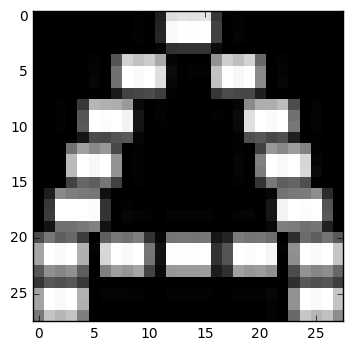

In [58]:
# Displaying a sample of the labels and images from the ndarray
# this functions might help you:
    # open file: open(pickle_file, 'rb')
    # load file: pickle.load(file)
    # create canvas: plt.figure()
    # draw: plt.imshow(two-dimension-image-array)
    # show picture: plt.show()
# -----------------------------------------------------------------------

    # do anything you want 
# -----------------------------------------------------------------------

---
Problem 3
---------
Another check: we expect the data to be balanced across classes. Verify that.

---

In [65]:
# calculate the count per class
# --------------------------------------------
    # do anything you want 

# ---------------------------------------------

{'J': 52911, 'E': 52912, 'G': 52912, 'F': 52912, 'H': 52912, 'C': 52912, 'I': 52912, 'A': 52909, 'B': 52911, 'D': 52911}
{'J': 1872, 'E': 1873, 'G': 1872, 'F': 1872, 'H': 1872, 'C': 1873, 'I': 1872, 'A': 1872, 'B': 1873, 'D': 1873}


Merge and prune the training data as needed. Depending on your computer setup, you might not be able to fit it all in memory, and you can tune `train_size` as needed. The labels will be stored into a separate array of integers 0 through 9.

Also create a validation dataset for hyperparameter tuning.

In [66]:
def make_arrays(nb_rows, img_size):
    if nb_rows:
        dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
        labels = np.ndarray(nb_rows, dtype=np.int32)
    else:
        dataset, labels = None, None
    return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
    num_classes = len(pickle_files)
    valid_dataset, valid_labels = make_arrays(valid_size, image_size)
    train_dataset, train_labels = make_arrays(train_size, image_size)

    vsize_per_class = valid_size // num_classes
    tsize_per_class = train_size // num_classes
    
    start_v, start_t = 0, 0
    end_v, end_t = vsize_per_class, tsize_per_class
    end_l = vsize_per_class + tsize_per_class

    for label, pickle_file in enumerate(pickle_files):       
        try:
            print(pickle_file)
            with open(pickle_file, 'rb') as f:
                letter_set = pickle.load(f)
                # let's shuffle the letters to have random validation and training set
                np.random.shuffle(letter_set)
        
                if valid_dataset is not None:
                    valid_letter = letter_set[:vsize_per_class, :, :]
                    valid_dataset[start_v:end_v, :, :] = valid_letter
                    valid_labels[start_v:end_v] = label
                    start_v += vsize_per_class
                    end_v += vsize_per_class

                train_letter = letter_set[vsize_per_class:end_l, :, :]
                train_dataset[start_t:end_t, :, :] = train_letter
                train_labels[start_t:end_t] = label
                start_t += tsize_per_class
                end_t += tsize_per_class
        except Exception as e:
            print('Unable to process data from', pickle_file, ':', e)
            raise
    
    return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

notMNIST_large/A.pickle
notMNIST_large/B.pickle
notMNIST_large/C.pickle
notMNIST_large/D.pickle
notMNIST_large/E.pickle
notMNIST_large/F.pickle
notMNIST_large/G.pickle
notMNIST_large/H.pickle
notMNIST_large/I.pickle
notMNIST_large/J.pickle
notMNIST_small/A.pickle
notMNIST_small/B.pickle
notMNIST_small/C.pickle
notMNIST_small/D.pickle
notMNIST_small/E.pickle
notMNIST_small/F.pickle
notMNIST_small/G.pickle
notMNIST_small/H.pickle
notMNIST_small/I.pickle
notMNIST_small/J.pickle
Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


Next, we'll randomize the data. It's important to have the labels well shuffled for the training and test distributions to match.

In [67]:
# print the first 100 elements of train labels 
# --------------------------------------------
    # do anything you want 

# ---------------------------------------------

(10000,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[4422 4109 2150 ..., 2810 5568 4472]


In [68]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

In [69]:
# print the first 100 elements of train labels again
# --------------------------------------------
    # do anything you want 

# ---------------------------------------------

[8 8 0 0 5 3 7 3 5 8 9 7 4 3 4 4 8 9 9 7 2 8 2 5 0 5 1 2 1 1 3 6 1 5 0 5 7
 3 9 5 0 4 6 0 2 6 0 3 7 9 9 2 5 8 7 3 7 6 9 3 0 6 5 6 4 8 0 9 4 9 5 5 7 0
 0 4 0 7 4 8 2 9 9 2 6 4 0 2 2 3 4 6 6 3 3 3 6 5 1 1]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[20000 20000 20000 20000 20000 20000 20000 20000 20000 20000]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


---
Problem 4
---------
Convince yourself that the data is still good after shuffling!

---

In [ ]:
# Convince yourself that the data is still good after shuffling!
# These functions might help you:
    # unique array: np.unique(array)
    # statistics of array: np.bincount(array)

# print the first 100 elements of train labels again
# print unique train_lables & test_labels
# print statistics for train_lables & test_labels
# --------------------------------------------
    # do anything you want 

# ---------------------------------------------

Finally, let's save the data for later reuse:

In [70]:
pickle_file = 'notMNIST.pickle'

try:
    f = open(pickle_file, 'wb')
    save = {
        'train_dataset': train_dataset,
        'train_labels': train_labels,
        'valid_dataset': valid_dataset,
        'valid_labels': valid_labels,
        'test_dataset': test_dataset,
        'test_labels': test_labels,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

In [71]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800503


---
Problem 5
---------

By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set! Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it.
Measure how much overlap there is between training, validation and test samples.

Optional questions:
- What about near duplicates between datasets? (images that are almost identical)
- Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments.
---

In [75]:
import hashlib
def reshape(arr):
    return arr.reshape(arr.shape[0], arr.shape[1] * arr.shape[2])

def unique_rows(a):
    a = np.ascontiguousarray(a) # Return a contiguous array in memory
    unique_a = np.unique(a.view([('', a.dtype)]*a.shape[1]))
    return unique_a.view(a.dtype).reshape((unique_a.shape[0], a.shape[1])) 

def sanitize(dataset_1, dataset_2, labels_1):
    dataset_hash_1 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_1])
    dataset_hash_2 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_2])
    overlap = []  # list of indexes
    for i, hash1 in enumerate(dataset_hash_1):
        duplicates = np.where(dataset_hash_2 == hash1)
        if len(duplicates[0]):
            overlap.append(i)
    return np.delete(dataset_1, overlap, 0), np.delete(labels_1, overlap, None)

# Follow these step:
# 1. Open 'notMNIST.pickle' and get train_dataset
# 2. Change the dimension of train_dataset from 3 to 2
# 3. Get unique rows array from train_dateset
# 4. Get the number of duplicate rows
# --------------------------------------------
    # do anything you want 

# ---------------------------------------------

(200000, 28, 28)
(200000, 784)
(187355, 784)
12645


---
Problem 6
---------

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

---

In [76]:
train_y = pickle_file['train_labels']
train_x = reshape(pickle_file['train_dataset'])

valid_y = pickle_file['valid_labels']
valid_x = reshape(pickle_file['valid_dataset'])

test_y = pickle_file['test_labels']
test_x = reshape(pickle_file['test_dataset'])
del(pickle_file)

# These functions might help you
    # create default logistic regression: LogisticRegression()
    # training model: model.fit(train_x, train_y)
    # predict: model.predict(test_x)
    # get score: model.score(test_x, test_y)    

The test score is 0.700000 and valid score is 0.640000 with 50 training samples
The test score is 0.740000 and valid score is 0.680000 with 100 training samples
The test score is 0.834000 and valid score is 0.771000 with 1000 training samples
The test score is 0.858600 and valid score is 0.789200 with 5000 training samples
The test score is 0.864400 and valid score is 0.795700 with 10000 training samples
